Forward Metod

In [196]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.decomposition import PCA
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt

np.random.seed(42)
X = np.random.rand(100, 5)
y = 2 * X[:, 0] + 3 * X[:, 1] + 0.5 * X[:, 2] + np.random.normal(0, 0.1, 100)
X = pd.DataFrame(X)
y = pd.DataFrame(y)


def forward_subset_selection(X, y, significance_level=0.05):
    remaining_features = list(X.columns)
    selected_features = []
    
    while len(remaining_features) > 0:
        best_p_value = float("inf")
        best_feature = None
        
        for feature in remaining_features:
            model_features = selected_features + [feature]
            X_subset = X[model_features]
            model = sm.OLS(y, sm.add_constant(X_subset)).fit()
            p_value = model.pvalues[feature]
            
            if p_value < best_p_value:
                best_p_value = p_value
                best_feature = feature
        
        if best_p_value <= significance_level:
            selected_features.append(best_feature)
            remaining_features.remove(best_feature)
        else:
            break
    
    return selected_features

selected_features = forward_subset_selection(X, y)
print(selected_features)

[1, 0, 2]


In [3]:
model = sm.OLS(y, sm.add_constant(X[selected_features]))
model.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      0   R-squared:                       0.989
Model:                            OLS   Adj. R-squared:                  0.988
Method:                 Least Squares   F-statistic:                     2781.
Date:                Wed, 30 Aug 2023   Prob (F-statistic):           3.80e-93
Time:                        18:25:03   Log-Likelihood:                 82.143
No. Observations:                 100   AIC:                            -156.3
Df Residuals:                      96   BIC:                            -145.9
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0073      0.037      0.196      0.845      -0.066       0.081
1              2.9618      0.037     79.956      0.000       2.888       3.035
0              1.9767      0.038     52.057      0.000       1.901       2.052
2              0.5472      0.038     14.329      0.000       0.471       0.623
==============================================================================
Omnibus:                        0.907   Durbin-Watson:                   1.867
Prob(Omnibus):                  0.635   Jarque-Bera (JB):                0.944
Skew:                           0.099   Prob(JB):                        0.624
Kurtosis:                       2.567   Cond. No.                         6.77
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [4]:
model = sm.OLS(y, sm.add_constant(X))
model.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      0   R-squared:                       0.989
Model:                            OLS   Adj. R-squared:                  0.988
Method:                 Least Squares   F-statistic:                     1647.
Date:                Wed, 30 Aug 2023   Prob (F-statistic):           7.36e-90
Time:                        18:25:06   Log-Likelihood:                 82.528
No. Observations:                 100   AIC:                            -153.1
Df Residuals:                      94   BIC:                            -137.4
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0237      0.046      0.514      0.609      -0.068       0.115
0              1.9737      0.038     51.316      0.000       1.897       2.050
1              2.9575      0.038     78.610      0.000       2.883       3.032
2              0.5463      0.039     14.113      0.000       0.469       0.623
3              0.0038      0.039      0.098      0.922      -0.074       0.081
4             -0.0314      0.037     -0.846      0.400      -0.105       0.042
==============================================================================
Omnibus:                        0.479   Durbin-Watson:                   1.868
Prob(Omnibus):                  0.787   Jarque-Bera (JB):                0.617
Skew:                           0.140   Prob(JB):                        0.735
Kurtosis:                       2.737   Cond. No.                         8.50
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Backward Metod

In [5]:
def backward_subset_selection(X, y, significance_level=0.05):
    selected_columns = list(X.columns)
    num_features = len(selected_columns)

    while True:
        X_subset = X[selected_columns]
        model = sm.OLS(y, sm.add_constant(X_subset)).fit()
        p_values = model.pvalues[1:] 

        max_p_value = p_values.max()
        if max_p_value > significance_level:
            idx_to_remove = p_values.idxmax()
            selected_columns.remove(idx_to_remove)
            num_features -= 1
        else:
            break

    return selected_columns

selected_features = backward_subset_selection(X, y)
print(selected_features)

[0, 1, 2]


In [6]:
model = sm.OLS(y, sm.add_constant(X[selected_features]))
model.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      0   R-squared:                       0.989
Model:                            OLS   Adj. R-squared:                  0.988
Method:                 Least Squares   F-statistic:                     2781.
Date:                Wed, 30 Aug 2023   Prob (F-statistic):           3.80e-93
Time:                        18:25:09   Log-Likelihood:                 82.143
No. Observations:                 100   AIC:                            -156.3
Df Residuals:                      96   BIC:                            -145.9
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0073      0.037      0.196      0.845      -0.066       0.081
0              1.9767      0.038     52.057      0.000       1.901       2.052
1              2.9618      0.037     79.956      0.000       2.888       3.035
2              0.5472      0.038     14.329      0.000       0.471       0.623
==============================================================================
Omnibus:                        0.907   Durbin-Watson:                   1.867
Prob(Omnibus):                  0.635   Jarque-Bera (JB):                0.944
Skew:                           0.099   Prob(JB):                        0.624
Kurtosis:                       2.567   Cond. No.                         6.77
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Stepwise metod

In [7]:
def stepwise_subset_selection(X, y, significance_level_entry=0.05, significance_level_exit=0.1):
    remaining_features = list(X.columns)
    selected_features = []
    
    while len(remaining_features) > 0:
        best_p_value = float('inf')
        best_feature = None
        current_model = sm.OLS(y, sm.add_constant(X[selected_features])).fit()
        current_best_p_value = current_model.pvalues.max()
        
        for feature in remaining_features:
            model_features = selected_features + [feature]
            X_subset = X[model_features]
            model = sm.OLS(y, sm.add_constant(X_subset)).fit()
            p_value = model.pvalues[feature]
            
            if p_value < best_p_value:
                best_p_value = p_value
                best_feature = feature
        
        if best_p_value <= significance_level_entry:
            selected_features.append(best_feature)
            remaining_features.remove(best_feature)
        elif current_best_p_value > significance_level_exit:
            break
        else:
            break
    
    return selected_features

selected_features = stepwise_subset_selection(X, y)
print(selected_features)

[1, 0, 2]


In [8]:
model = sm.OLS(y, sm.add_constant(X[selected_features]))
model.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      0   R-squared:                       0.989
Model:                            OLS   Adj. R-squared:                  0.988
Method:                 Least Squares   F-statistic:                     2781.
Date:                Wed, 30 Aug 2023   Prob (F-statistic):           3.80e-93
Time:                        18:25:11   Log-Likelihood:                 82.143
No. Observations:                 100   AIC:                            -156.3
Df Residuals:                      96   BIC:                            -145.9
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0073      0.037      0.196      0.845      -0.066       0.081
1              2.9618      0.037     79.956      0.000       2.888       3.035
0              1.9767      0.038     52.057      0.000       1.901       2.052
2              0.5472      0.038     14.329      0.000       0.471       0.623
==============================================================================
Omnibus:                        0.907   Durbin-Watson:                   1.867
Prob(Omnibus):                  0.635   Jarque-Bera (JB):                0.944
Skew:                           0.099   Prob(JB):                        0.624
Kurtosis:                       2.567   Cond. No.                         6.77
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Ridge Regression

In [152]:
def ridge_regression(X, y):
    
    parameters = {"alpha": [1e-15, 1e-10, 1e-8, 1e-4, 1e-3, 1e-2, 1, 5, 10, 20]}
    ridge_regressor = GridSearchCV(Ridge(), parameters, scoring="neg_mean_squared_error", cv=5)
    ridge_regressor.fit(X, y)
    
    return ridge_regressor.best_params_["alpha"],-ridge_regressor.best_score_
 
    
ridge_regression(X, y)

(0.001, 0.012527252316030224)

Lasso Regression

In [153]:
def lasso_regression(X, y):
    
    parameters = {"alpha": [1e-15, 1e-10, 1e-8, 1e-4, 1e-3, 1e-2, 1, 5, 10, 20]}
    lasso_regressor = GridSearchCV(Lasso(), parameters, scoring="neg_mean_squared_error", cv=5)
    lasso_regressor.fit(X, y)
    
    return lasso_regressor.best_params_["alpha"], -lasso_regressor.best_score_

lasso_regression(X,y)

(0.001, 0.012449274979383558)

PCA

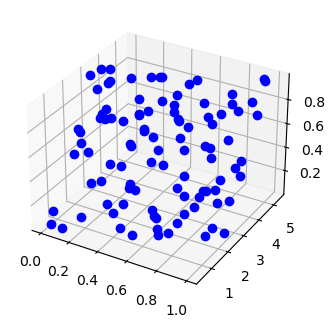

In [201]:
fig = plt.figure(figsize=(6, 3.8))
ax = fig.add_subplot(111, projection='3d')
ax.plot(X.iloc[:, 0], y,X.iloc[:, 1] , "bo")
plt.show()

Missed info 0.008717975754589102


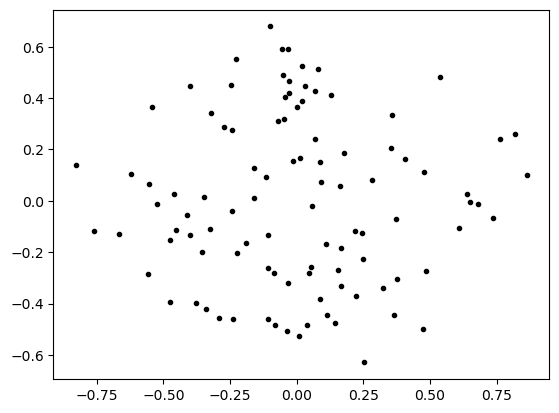

In [214]:
X2D = PCA(n_components = 2).fit_transform(X)

fig = plt.figure()
ax = fig.add_subplot(111)

ax.plot(X2D[:, 0], X2D[:, 1], "k.")

print("Missed info",1 - pca.explained_variance_ratio_.sum())